In [14]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn 
import seaborn as sns

In [15]:
cars_file = 'https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv'
cars = pd.read_csv(cars_file)
cars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


<Axes: xlabel='wt', ylabel='mpg'>

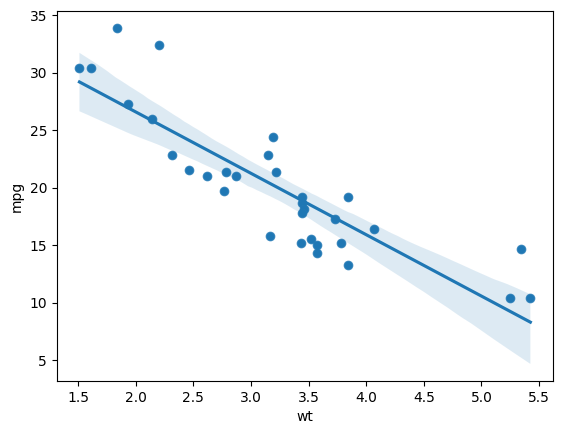

In [16]:
sns.scatterplot(x='wt', y='mpg', data=cars)
sns.regplot(x='wt', y='mpg', data=cars)

In [17]:
X_list = cars.wt.values
X_np = np.array(X_list, dtype=np.float32).reshape(-1,1)
y_list = cars.mpg.values
y_np = np.array(y_list, dtype=np.float32).reshape(-1,1)
X = torch.from_numpy(X_np)
y_true = torch.from_numpy(y_np)

#### Model class

In [18]:
class LinearRegressionTorch(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionTorch, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        return self.linear(x)

In [19]:
input_dim = 1
output_dim = 1
model = LinearRegressionTorch(input_size=input_dim, output_size=output_dim)
model.train()

LinearRegressionTorch(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

## Loss Function

In [20]:
loss_fun = nn.MSELoss()

#### Optimizer

In [21]:
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#### Perform Training

In [22]:
losses = []
slope, bias = [], []
NUM_EPOCHS = 1000
BATCH_SIZE = 2
for epoch in range(NUM_EPOCHS):
    for i in range(0, X.shape[0], BATCH_SIZE):
        # optimization
        optimizer.zero_grad()

        # forward pass
        y_pred = model(X[i:i+BATCH_SIZE])

        # compute loss
        loss = loss_fun(y_pred, y_true[i:i+BATCH_SIZE])
        losses.append(loss.item())

        # backprop
        loss.backward()

        # update weights
        optimizer.step()
    
    # get parameters
    for name, param in model.named_parameters():
        if param.requires_grad:
            if name == 'linear.weight':
                slope.append(param.data.numpy()[0][0])
            if name == 'linear.bias':
                bias.append(param.data.numpy()[0])


    # store loss
    losses.append(float(loss.data))
    # print loss
    if (epoch % 100 == 0):
        print(f"Epoch {epoch}, Loss: {loss.data}")



Epoch 0, Loss: 37.25130081176758
Epoch 100, Loss: 1.5728867053985596
Epoch 200, Loss: 1.4116040468215942
Epoch 300, Loss: 1.4094330072402954
Epoch 400, Loss: 1.409427285194397
Epoch 500, Loss: 1.409427285194397
Epoch 600, Loss: 1.409427285194397
Epoch 700, Loss: 1.409427285194397
Epoch 800, Loss: 1.409427285194397
Epoch 900, Loss: 1.409427285194397


#### visualise model training

<Axes: >

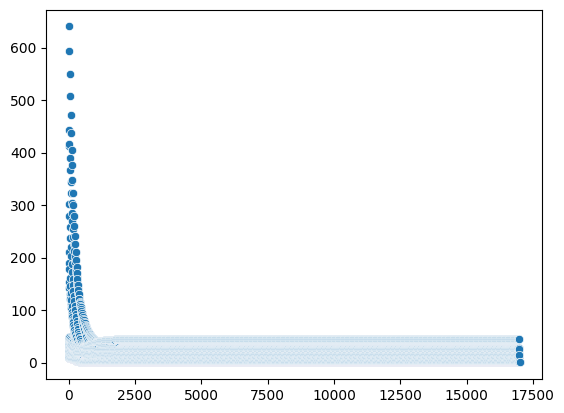

In [23]:
sns.scatterplot(x=range(len(losses)), y=losses)

#### Visualise the bias development

<Axes: >

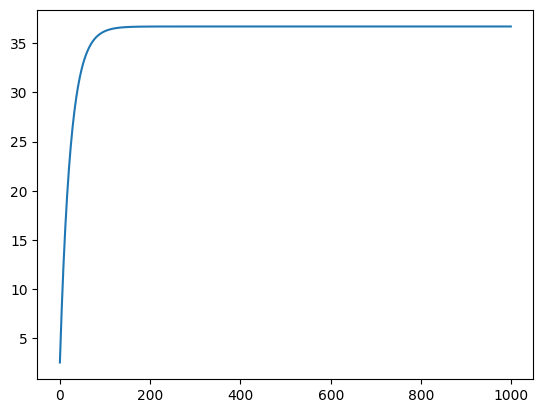

In [24]:
sns.lineplot(x=range(NUM_EPOCHS), y=bias)

#### visualise the slope development

<Axes: >

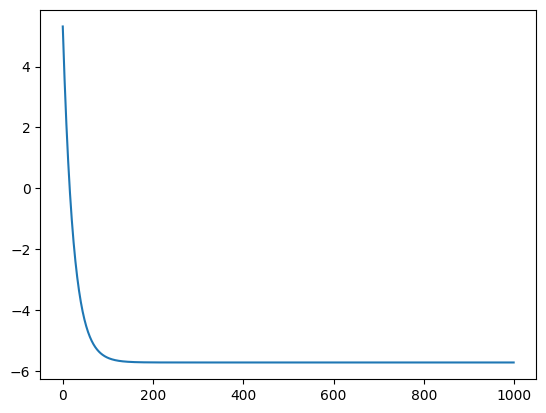

In [25]:
sns.lineplot(x=range(NUM_EPOCHS), y=slope)

#### Check the result

<Axes: >

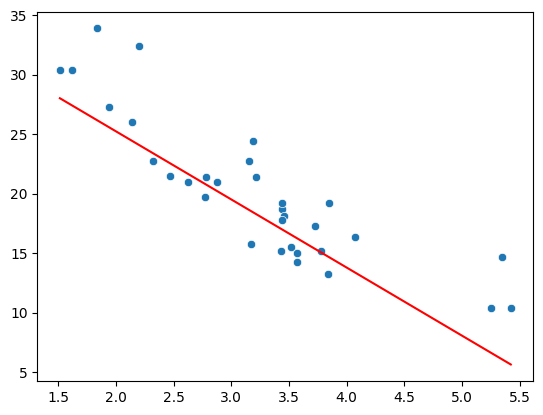

In [26]:
model.eval()
y_pred = [i[0] for i in model(X).data.numpy()]
y = [i[0] for i in y_true.data.numpy()]
sns.scatterplot(x=X_list, y=y)
sns.lineplot(x=X_list, y=y_pred, color='red')